y set lengths
1001
x set lengths
1001


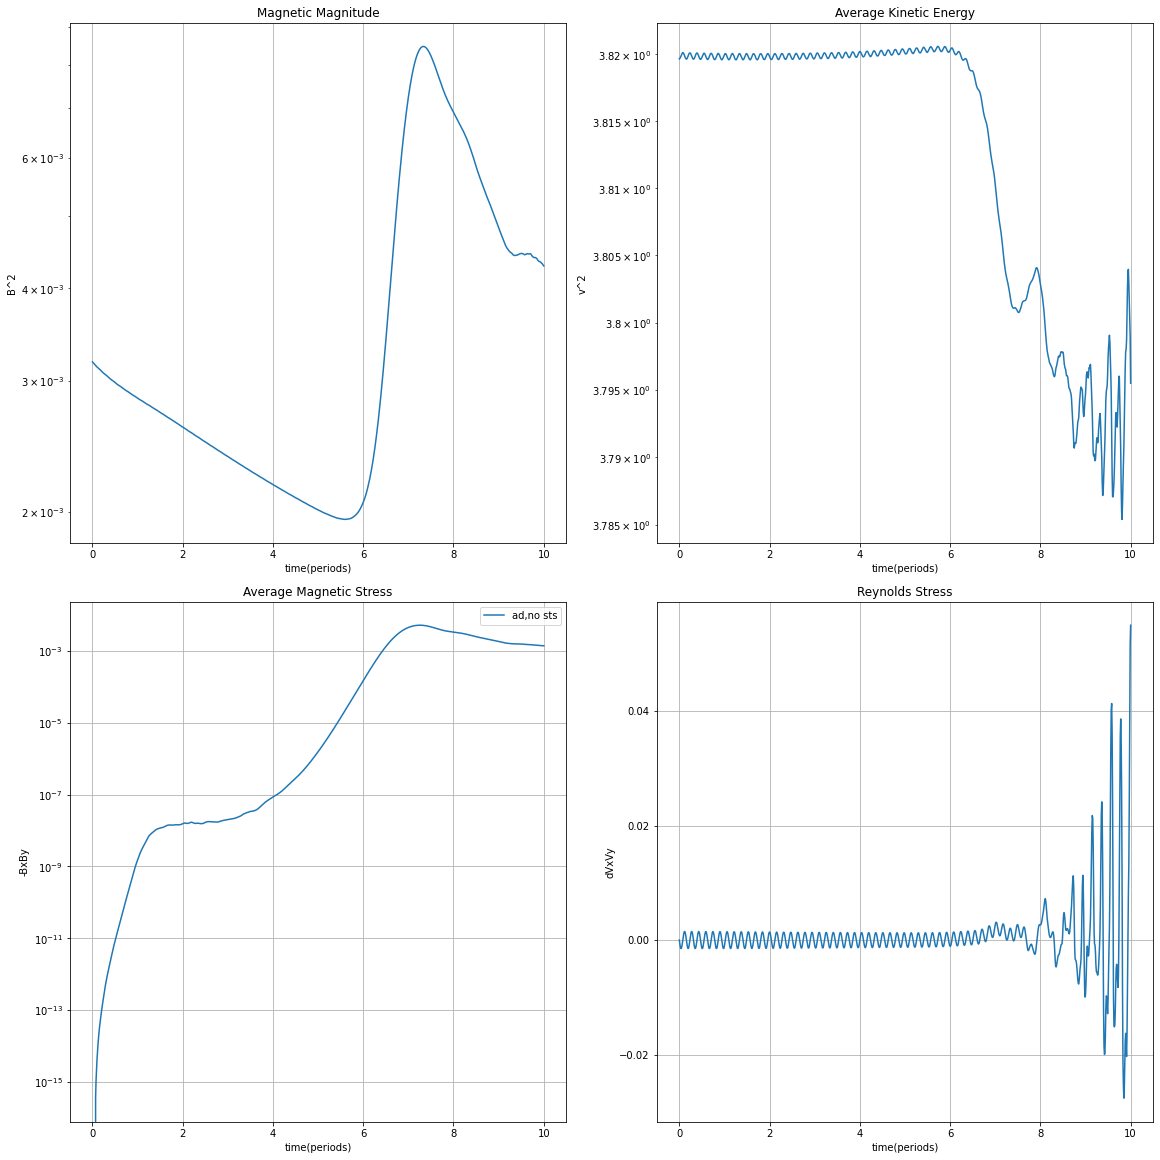

0.00117532
-2.929843873550974


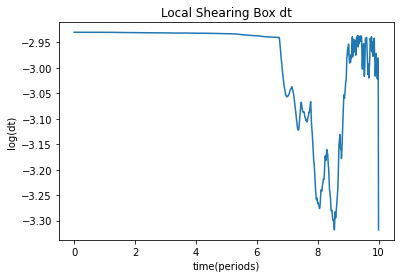

In [7]:




import sys
sys.path.append('~/athena-public-version/vis/python/')
#sys.path.append('~/.local/lib/python3.8/site-packages/')
sys.path.append('~/working')

import numpy as np
import matplotlib.pyplot as plt


#IMPORT APPROPRIATE ATHINPUT FILE
#import athinput.hgb as athin


import athena_read
data = athena_read.hst('./HGB.hst')


#Load other resolution data sets
#data_std_res = athena_read.hst('/std_res_adv.hst')
#double and quad res commented out throughout
#data_double_res = athena_read.hst('./2_res_adv.hst')

#set x values as time
x_vals=((data['time']))

#to match HGB, divide by 2 pi, because of difference in code units: 1/omega vs period
x_vals_adj = x_vals/(2*np.pi)
#print(x_vals)

#Calculate volume from athinput variables
#x_len = athin.x1max-athin.x1min
#y_len = athin.x2max-athin.x2min
#z_len = athin.x3max-athin.x3max
#volume = x_len*y_len*z_len
#print(volume)
#-------------------------------------------------------------------------
#Magnetic Stress

#Y_vals are BxBy dsata from HGB, still pending correction factor
y_vals=(data['-BxBy'])
#y_vals_std_res=(data_std_res['-BxBy'])
#y_vals_double_res=(data_double_res['-BxBy'])

#set length of x_vals for the 4x dimension to be equal to whatever hst length we currently have

x_vals_adj_4x = x_vals_adj[0:len(y_vals)]

#Scale to HGB (change code units for B, divide by volume for volume avg)
volume = np.pi*2

y_vals= y_vals /volume
#y_vals_std_res= y_vals_std_res /volume
#y_vals_double_res= y_vals_double_res /volume


print('y set lengths')
print(len(y_vals))
#print(len(y_vals_std_res))
#print(len(y_vals_double_res))

print('x set lengths')
print(len(x_vals_adj))
#print(len(x_vals_adj_4x))
#print(y_vals)

#figure formatting
fig, ax=plt.subplots(2,2, sharex=False, sharey = False, constrained_layout=True)

fig.set_figheight(16)
fig.set_figwidth(16)


ax[1,0].semilogy(x_vals_adj_4x,y_vals,label='ad,no sts')
#ax[1,0].plot(x_vals_adj,y_vals_std_res,label='Equal HGB')
#ax[1,0].plot(x_vals_adj,y_vals_double_res,label='Double HGB')



ax[1,0].set(xlabel='time(periods)',ylabel='-BxBy',title = 'Average Magnetic Stress')
ax[1,0].grid()
ax[1,0].legend()
#fig.savefig('BxBy_plot.png')



#-------------------------------------------------------------
#Copy for B^2

#Y_vals are BxBy dsata from HGB, still pending correction factor

#ADJUST FOR B^2 (magnitude of columns 10-12)

mex = data['1-ME']
mey = data['2-ME']
mez = data['3-ME']

#print('Length of b_x')
#print(len(mex))

me_total = (mex+mey+mez)

#print('Length of b_2')
#print(len(me_total))
y_vals=(me_total)
#-------------------------
#For std res
#mex = data_std_res['1-ME']
#mey = data_std_res['2-ME']
#mez = data_std_res['3-ME']

#print('Length of b_x')
#print(len(mex))

#me_total = (mex+mey+mez)

#print('Length of b_2')
#print(len(me_total))
#y_vals_std_res=(me_total)


#------------------------
#For double res
#mex = data_double_res['1-ME']
#mey = data_double_res['2-ME']
#mez = data_double_res['3-ME']

#print('Length of b_x')
#print(len(mex))

#me_total = (mex+mey+mez)

#print('Length of b_2')
#print(len(me_total))
#y_vals_double_res=(me_total)


#Scale to HGB (divide by volume for volume avg)
y_vals= y_vals / volume
#y_vals_std_res= y_vals_std_res / volume
#y_vals_double_res= y_vals_double_res / volume

#fig, ax=plt.subplots()
ax[0,0].semilogy(x_vals_adj_4x,y_vals)
#ax[0,0].semilogy(x_vals_adj,y_vals_std_res)
#ax[0,0].semilogy(x_vals_adj,y_vals_double_res)
ax[0,0].set(xlabel='time(periods)',ylabel='B^2',title = 'Magnetic Magnitude')
ax[0,0].grid()
#fig.savefig('B^2_plot_logscale.png')




#-------------------------------------------------
#Copy for VxVy
#Y_vals are dVxVy  dsata from HGB, still pending correction factor
y_vals=(data['dVxVy'])
#y_vals_std_res=(data_std_res['dVxVy'])
#y_vals_double_res=(data_double_res['dVxVy'])
#Scale to HGB (divide by volume for volume avg)
y_vals= y_vals / volume
#y_vals_std_res= y_vals_std_res / volume
#y_vals_double_res= y_vals_double_res / volume


#print(y_vals)


#fig, ax=plt.subplots()
ax[1,1].plot(x_vals_adj_4x,y_vals)
#ax[1,1].plot(x_vals_adj,y_vals_std_res)
#ax[1,1].plot(x_vals_adj,y_vals_double_res)
ax[1,1].set(xlabel='time(periods)',ylabel='dVxVy',title = 'Reynolds Stress')
ax[1,1].grid()
#fig.savefig('dVxVy_plot.png')


#-------------------------------------------------
#Copy for v^2
#Y_vals are KE column data from HGB, still pending correction factor

mass = data['mass'][4]

ke_x = data['1-KE']
ke_y = data['2-KE']
ke_z = data['3-KE']
ke_sum = ke_x+ke_y+ke_z
v_2_div_2 = ke_sum

y_vals = v_2_div_2
#copy for other resolutions

#ke_x = data_std_res['1-KE']
#ke_y = data_std_res['2-KE']
#ke_z = data_std_res['3-KE']
#ke_sum = ke_x+ke_y+ke_z
#v_2_div_2_std_res = ke_sum


#y_vals_std_res=v_2_div_2_std_res
#copy for other resolutions
#ke_x = data_double_res['1-KE']
#ke_y = data_double_res['2-KE']
#ke_z = data_double_res['3-KE']
#ke_sum = ke_x+ke_y+ke_z
#v_2_div_2_double_res = ke_sum


#y_vals_double_res=v_2_div_2_double_res

#Scale to HGB (divide by volume for volume avg)
y_vals= y_vals / volume
#y_vals_std_res= y_vals_std_res / volume
#y_vals_double_res= y_vals_double_res / volume
#print(y_vals)


#fig, ax=plt.subplots()
ax[0,1].semilogy(x_vals_adj_4x,y_vals)
#ax[0,1].semilogy(x_vals_adj,y_vals_std_res)
#ax[0,1].semilogy(x_vals_adj,y_vals_double_res)

ax[0,1].set(xlabel='time(periods)',ylabel='v^2',title = 'Average Kinetic Energy')
ax[0,1].grid()
plt.show()
#fig.savefig('hgb_graphs_new.png')



#----------------------------------

#Separate dt graph, log scaled



# Data for plotting
dt = data['dt']
y_vals=np.log10(dt)

print(dt[2])
print(y_vals[2])
#dt_std_res = data_std_res['dt']
#y_vals_std_res=np.log10(dt_std_res)

#dt_double_res = data_double_res['dt']
#y_vals_double_res=np.log10(dt_double_res)
#s = 1 + np.sin(2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(x_vals_adj_4x,y_vals)
#ax.plot(x_vals_adj,y_vals_std_res)
#ax.plot(x_vals_adj,y_vals_double_res)
ax.set(xlabel ='time(periods)',ylabel='log(dt)',title = 'Local Shearing Box dt')
plt.show()
#fig.savefig('dt_graph_new.png')
#ax.set(xlabel='time (s)', ylabel='voltage (mV)',
#               title='About as simple as it gets, folks')
#ax.grid()

#fig.savefig("test.png")
#plt.show()


        